In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Arguments
# - utility: an np.array where utility[a] is the utility of answer a
# - epsilon > 0: the privacy parameter
# - We can assume the utility is bounded (we can actually test this by looking at its min and max)
# we can re-use this function for any fixed u(., q, x) where only a varies
# Returns
# - a random answer with probability proportional to exp(epsilon u(a, q, x) / 2 sensitivity(u(., q, x))
def exponential_mechanism(utility, epsilon):
    # first, define the probability of every answer.
    sensitivity = max(utility) - min(utility)
    probability = np.exp(epsilon * utility / (2 * sensitivity))
    # we want sum_a probability[a] = 1
    probability /= np.sum(probability)
    # we want to sample from this distribution 
    # we can use np.random.choice
    
def epsilon_greedy_mechanism(utility, epsilon):
    # this is the wrong implementation!
    if (np.random.uniform()<epsilon):
        return np.argmax(utility)
    else:
        return np.random.choice(len(utility))

    

In [21]:
def calculate_expected_value(utility, epsilon, n_samples):
    value = 0
    for i in range(n_samples):
        a = exponential_mechanism(utility, epsilon)
        value += utility[a]
    return value / n_samples

The maximum utility is 5


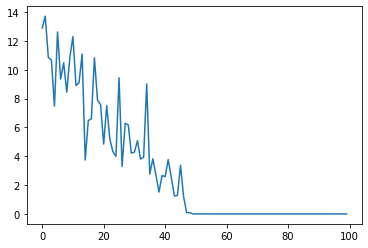

In [30]:
# now we test the exponential mechanism

# create a simple utility vector
utility = np.array([0,1,2,3,4,5,4,3,2,1,-100])
print("The maximum utility is", np.max(utility))

# values of epsilon to try
epsilon_range  = np.linspace(0,2,100)
n_samples = 100
exp_utility = [calculate_expected_value(utility, epsilon, n_samples) for epsilon in epsilon_range]

plt.plot(np.max(utility) - exp_utility)


In [39]:
sum(np.exp(utility))/sum(np.exp(utility))

1.0

In [40]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``a`` can be selected mu

In [59]:
utility=np.array([0,1,2,3,4,5,4,3,2,1,-100])
utility = utility / (np.max(utility) - np.min(utility))

In [62]:
utility

array([ 0.        ,  0.00952381,  0.01904762,  0.02857143,  0.03809524,
        0.04761905,  0.03809524,  0.02857143,  0.01904762,  0.00952381,
       -0.95238095])

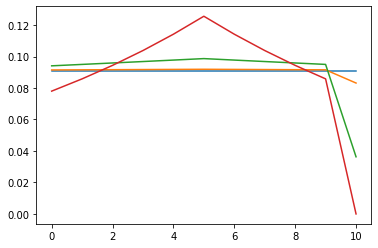

In [64]:
# Here you can se that as we increase epsilon, the probability of the best answer increases and the worst ones decrease
epsilon = 0;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility))) # here it is uniform!
epsilon = 0.1;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility)))
epsilon = 1;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility)))
epsilon = 10;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility)))
